# Actividad - Estadística básica

* **Nombre:** Fabián Avilés Cortés
* **Matrícula:** A0137678

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [23]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [4]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
df = pd.read_csv('/content/bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [7]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriorment.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User Rating  550 non-null    float64
 1   Reviews      550 non-null    int64  
 2   Price        550 non-null    int64  
 3   Genre        550 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 17.3+ KB


,User Rating,Reviews,Price
count,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000
std,0.226980,11731.132017,10.842262
min,3.300000,37.000000,0.000000
25%,4.500000,4058.000000,7.000000
50%,4.700000,8580.000000,11.000000
75%,4.800000,17253.250000,16.000000
max,4.900000,87841.000000,105.000000


In [8]:
df = pd.read_csv('bestsellers with categories.csv', usecols=['User Rating', 'Reviews', 'Price', 'Genre'])
df.corr()

,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


¿Cuáles son las variables relevantes e irrelevantes para el análisis?

Las variables revelantes para este análisis son User Rating, Reviews Price. Esto porque son las variables que tienen datos numericos que podemos anlizar, Year estando excluido debido a que se puede tomar como variable cualitativa

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?

  Eliminaria la variable de Year, debido a que se puede tomar como cualitativa.

* ¿Existen variables que tengan datos extraños?

  Si, la variable price nos muestra un libro con un precio minimo de 0.

* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?

  Las variables no tienen rangos similares, por lo que es recomendable normalizar los rangos de las variables.

* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

  No observo que existan grupos que se parezcan.

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

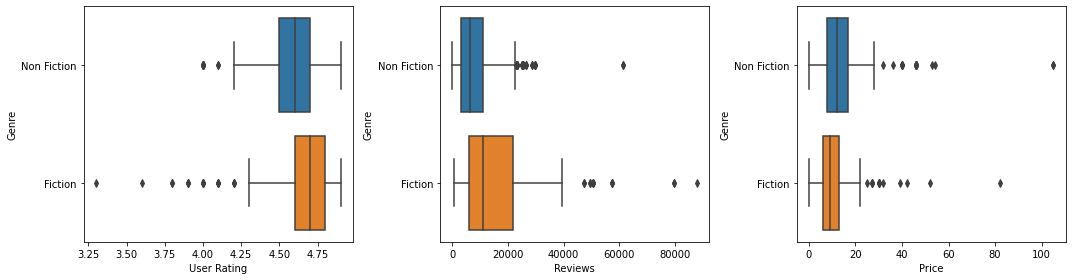

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(data=df, x = 'User Rating', y='Genre', ax=axs[0])
sns.boxplot(data=df, x = 'Reviews', ax=axs[1], y='Genre')
sns.boxplot(data=df, x = 'Price', ax=axs[2], y='Genre')

plt.tight_layout()


<Axes: >

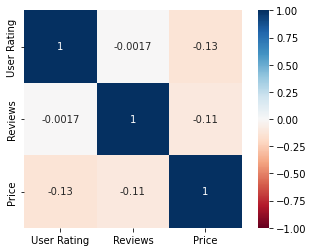

In [10]:
dfheat = df.corr()
sns.heatmap(data=dfheat, vmin=-1, vmax = 1, cmap='RdBu', annot=True, square=True)

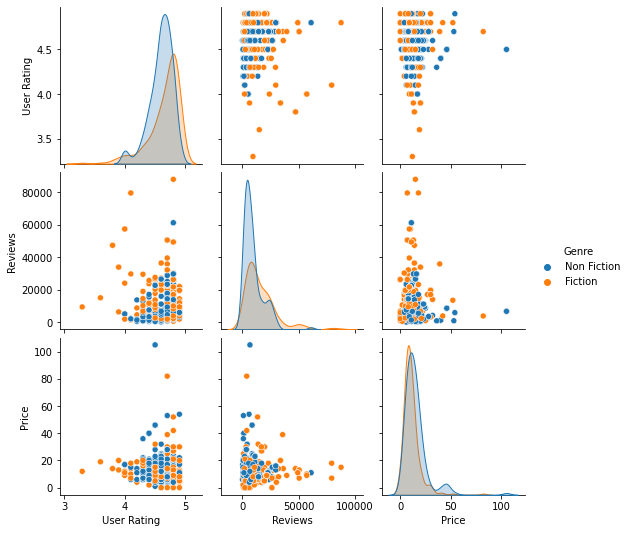

In [17]:
sns.pairplot(data=df, hue='Genre')

En las graficas de caja se observa que para User Rating, el segundo y tercer cuartil se encuentran en un rango de 4.5 a 5.0. En el caso de reviews, los cuartiles estan en un rango de 0 a 200000 y en Price los cuartiles estan entre 10 y 20.

En el mapa de calor se observa que los datos no tienen una correlación fuerte, debido al rango de valores que se obtienen.

En los graficos de dispersion se oberva que si los datos si se agrupan.

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
- ¿Cómo obtuviste el valor de $k$ a usar?
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
- ¿Qué puedes decir de los datos basándose en los centros?

In [31]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.
cols = ['User Rating', 'Reviews', 'Price']
x = df.loc[:, cols]

scaler = StandardScaler()

xNorm = scaler.fit_transform(x)
xNorm = pd.DataFrame(xNorm, columns = cols)
xNorm.head()

,User Rating,Reviews,Price
0,0.359990,0.460453,-0.470810
1,-0.080978,-0.844786,0.821609
2,0.359990,0.599440,0.175400
3,0.359990,0.808050,-0.655441
4,0.800958,-0.365880,-0.101547


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Silhouette Score')

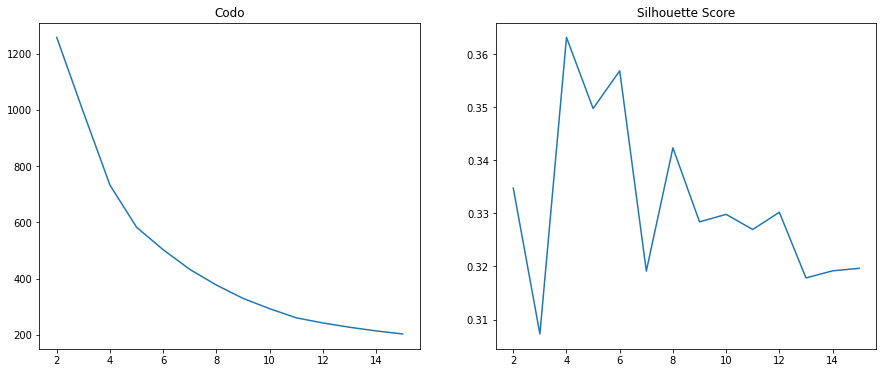

In [35]:
kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []


for k in grupos:
    model = KMeans(n_clusters=k, random_state = 47)
    clusters = model.fit_predict(xNorm)
    wcss.append(model.inertia_)
    sil_score.append(silhouette_score(xNorm, clusters))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(grupos, wcss)
axs[0].set_title('Codo')
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

In [37]:
model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(xNorm)

df['Grupo'] = clusters.astype('str')
df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,User Rating,Reviews,Price,Genre,Grupo
0,4.7,17350,8,Non Fiction,0
1,4.6,2052,22,Fiction,2
2,4.7,18979,15,Non Fiction,0
3,4.7,21424,6,Fiction,0
4,4.8,7665,12,Non Fiction,2


Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

Grupo 0: Libros baratos y con reviews buenas no ficticios

Grupo 1 Libros Caros y con reviews no muy buenas de fición

Grupo 2 Libros accesibles y con reviews buenas no ficticios

Grupo 3 Libros baratos y con reviews excelentes de fición

Grupo 4 Libros accesibles con reviews no muy buenas no ficticios

In [40]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.
df.groupby('Grupo').mean()


,User Rating,Reviews,Price
Grupo,,,
0,4.693846,27444.646154,9.084615
1,4.232143,8631.666667,12.416667
2,4.698065,6753.977419,11.900000
3,4.538462,7219.538462,49.692308


In [41]:
df.groupby('Grupo').std()

,User Rating,Reviews,Price
Grupo,,,
0,0.184161,12779.526505,3.833825
1,0.208933,9097.337152,5.013736
2,0.118770,4145.890023,6.819423
3,0.144435,6978.798305,18.750508


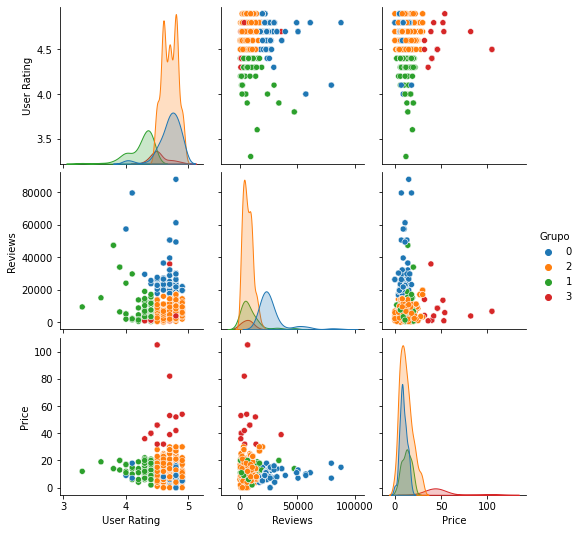

In [43]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.
sns.pairplot(data = df, hue='Grupo')
